In [87]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from google.colab import drive

In [72]:
#mounting the google drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
#making connection with the database file in the google drive
db_File='/content/drive/MyDrive/queue_system_sqlite3.db'
db_conn=sqlite3.connect(db_File)
cursor=db_conn.cursor()

In [118]:
#Load data into pandas dataframes
calls=pd.read_sql('select * from calls', db_conn)
queues=pd.read_sql('select * from queues', db_conn)
services=pd.read_sql('select * from services', db_conn)
counters=pd.read_sql('select * from counters', db_conn)
users=pd.read_sql('select * from users', db_conn)

In [119]:
#check missing values
print(f"Missing values in the **Calls** Table \n {calls.isnull().sum()} \n")
print(f"Missing values in the **queues** Table \n {queues.isnull().sum()} \n")
print(f"Missing values in the **services** Table \n {services.isnull().sum()} \n")
print(f"Missing values in the **counters** Table \n {counters.isnull().sum()} \n")
print(f"Missing values in the **users** Table \n {users.isnull().sum()} \n")



Missing values in the **Calls** Table 
 id                    0
queue_id              0
service_id            0
counter_id            0
user_id               0
token_letter          0
token_number          0
called_date           0
started_at            0
ended_at             19
waiting_time          0
served_time         617
turn_around_time    617
created_at            0
updated_at            0
call_status_id       19
dtype: int64 

Missing values in the **queues** Table 
 id                 0
service_id         0
number             0
called             0
reference_no       0
letter             0
name            3374
email           3374
phone           3374
position           0
created_at         0
updated_at         0
dtype: int64 

Missing values in the **services** Table 
 id                           0
name                         0
letter                       0
start_number                 0
status                       0
sms_enabled                  0
optin_message_enabled   

In [121]:
#Handle missing values for calls table
calls['ended_at'].fillna('1900-01-01 00:00:00', inplace=True) #replacing with 1900-01-01 00:00:00 as ended_at is of type datetime
calls['served_time'].fillna('00:00:00', inplace=True) #replacing with 00:00:00 as served_time is of type time
calls['turn_around_time'].fillna('00:00:00', inplace=True) #replacing with 00:00:00 as turn_around_time is of type time
calls['call_status_id'].fillna(0, inplace=True) #replacing with 0 as call_status_id is of type integer

#Handle missing values for queues table
queues['name'].fillna('Unknown', inplace=True) #replacing the missing values with 'Unknown'
queues['email'].fillna('Unknown', inplace=True) #replacing the missing values with 'Unknown'
queues['phone'].fillna('Unknown', inplace=True) #replacing the missing values with 'Unknown'

#Handle missing values for services table
services['optin_message_format'].fillna('Unknown', inplace=True) #replacing the missing values with 'Unknown'
services['call_message_format'].fillna('Unknown', inplace=True) #replacing the missing values with 'Unknown'
services['noshow_message_format'].fillna('Unknown', inplace=True) #replacing the missing values with 'Unknown'
services['completed_message_format'].fillna('Unknown', inplace=True) #replacing the missing values with 'Unknown'
services['status_message_format'].fillna('Unknown', inplace=True)  #replacing the missing values with 'Unknown'
services['status_message_positions'].fillna('Unknown', inplace=True) #replacing the missing values with 'Unknown'

#handle missing values in the users table
users['email_verified_at'].fillna('1900-01-01', inplace=True) #replacing with 1900-01-01 as email_verified_at is a timestamp
users['remember_token'].fillna('Unknown', inplace=True)
users['image'].fillna('Unknown', inplace=True)

In [122]:
#check for missing values after handling the null values
#check missing values
print(f"Missing values in the **Calls** Table \n {calls.isnull().sum()} \n")
print(f"Missing values in the **queues** Table \n {queues.isnull().sum()} \n")
print(f"Missing values in the **services** Table \n {services.isnull().sum()} \n")
print(f"Missing values in the **counters** Table \n {counters.isnull().sum()} \n")
print(f"Missing values in the **users** Table \n {users.isnull().sum()} \n")

Missing values in the **Calls** Table 
 id                  0
queue_id            0
service_id          0
counter_id          0
user_id             0
token_letter        0
token_number        0
called_date         0
started_at          0
ended_at            0
waiting_time        0
served_time         0
turn_around_time    0
created_at          0
updated_at          0
call_status_id      0
dtype: int64 

Missing values in the **queues** Table 
 id              0
service_id      0
number          0
called          0
reference_no    0
letter          0
name            0
email           0
phone           0
position        0
created_at      0
updated_at      0
dtype: int64 

Missing values in the **services** Table 
 id                           0
name                         0
letter                       0
start_number                 0
status                       0
sms_enabled                  0
optin_message_enabled        0
call_message_enabled         0
noshow_message_enabled       0

In [54]:
#!!!for testing purpose donot uncomment and run !!!

#calls['ended_at'] = calls['ended_at'].replace('Unknown', pd.Timestamp('1900-01-01 12:00:00'))
#calls['served_time'] = calls['ended_at'].replace('Unknown', pd.Timestamp('00:00:00'))
#calls['turn_around_time'] = calls['turn_around_time'].replace('Unknown', pd.Timestamp('00:00:00'))
#calls['call_status_id'] = calls['call_status_id'].replace(0.0, int(0))


In [78]:
o=calls['served_time']# == 'unknown'] #pd.Timestamp('00:00:00')]
o

0       00:08:01
1       00:00:08
2       00:00:00
3       00:00:04
4       00:01:02
          ...   
3349    00:25:58
3350    00:12:38
3351    00:00:00
3352    00:00:00
3353    01:36:20
Name: served_time, Length: 3354, dtype: object

In [56]:
#--------------------------------------------------------------------Descriptive Statistics----------------------------------------------------------------------------------------------------

In [92]:
#Calculating Mean, Median, Standard Deviation for waiting-time, served-time and turn-around-time

# Converting time columns to timedelta
calls['waiting_time'] = pd.to_timedelta(calls['waiting_time'])
calls['served_time'] = pd.to_timedelta(calls['served_time'])
calls['turn_around_time'] = pd.to_timedelta(calls['turn_around_time'])

# Calculating descriptive statistics
statistics = {}

for column in ['waiting_time', 'served_time', 'turn_around_time']:
    statistics[column] = {
        'mean': calls[column].mean(),
        'median': calls[column].median(),
        'std': calls[column].std(),
        'max': calls[column].max()
    }

# Converting timedeltas to seconds for better readability
for column, stats in statistics.items():
    stats['mean'] = stats['mean'].total_seconds()
    stats['median'] = stats['median'].total_seconds()
    stats['std'] = stats['std'].total_seconds()
    stats['max'] = stats['max'].total_seconds()

# Displaying the results
for column, stats in statistics.items():
    print(f"Statistics for {column}:")
    print(f"  Mean: {stats['mean']} seconds")
    print(f"  Median: {stats['median']} seconds")
    print(f"  Standard Deviation: {stats['std']} seconds")
    print(f"  maximum {column}: {stats['max']} seconds")

    print()

Statistics for waiting_time:
  Mean: 4208.298151 seconds
  Median: 3762.5 seconds
  Standard Deviation: 2957.112034 seconds
  maximum waiting_time: 17713.0 seconds

Statistics for served_time:
  Mean: 597.442158 seconds
  Median: 528.5 seconds
  Standard Deviation: 695.103846 seconds
  maximum served_time: 11024.0 seconds

Statistics for turn_around_time:
  Mean: 3975.805605 seconds
  Median: 3389.0 seconds
  Standard Deviation: 3352.026919 seconds
  maximum turn_around_time: 19101.0 seconds



In [84]:
#---------------------------------------------------------------Visualisation of key metrics-------------------------------------------------------------------------------------------------------

<ipython-input-123-e820dfff961a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls['call_duration'] = calls['ended_at'] - calls['started_at']
<ipython-input-123-e820dfff961a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls['waiting_time'] = pd.to_timedelta(calls['waiting_time'])
<ipython-input-123-e820dfff961a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

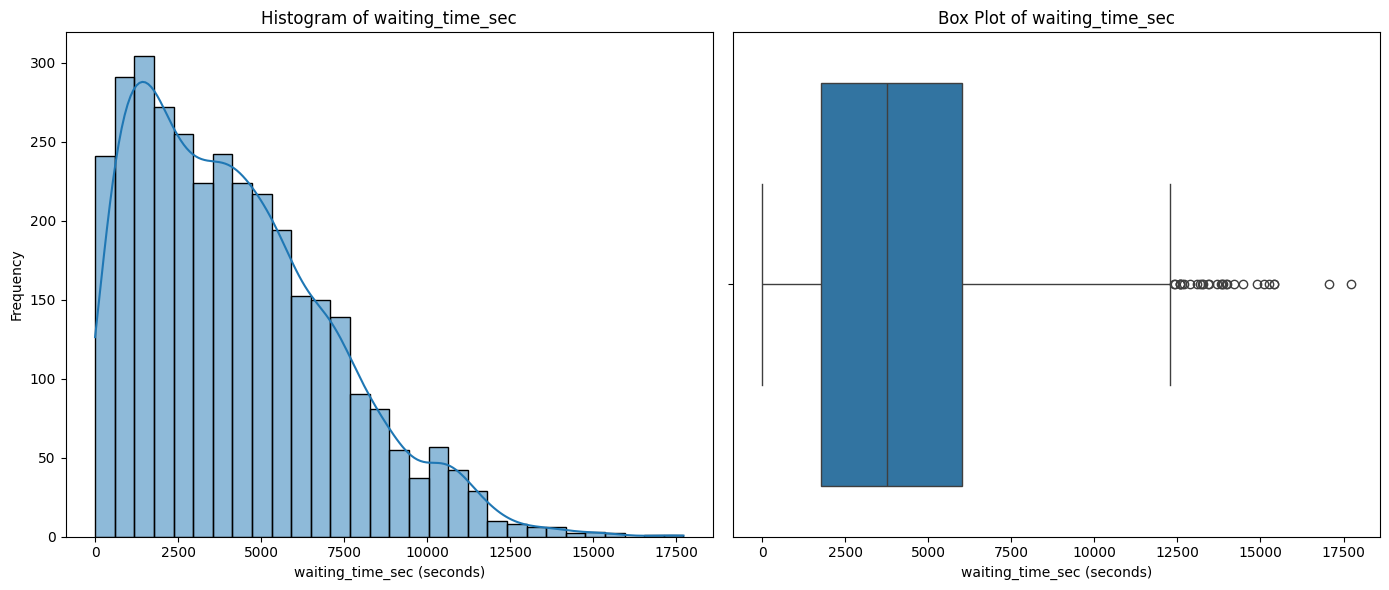

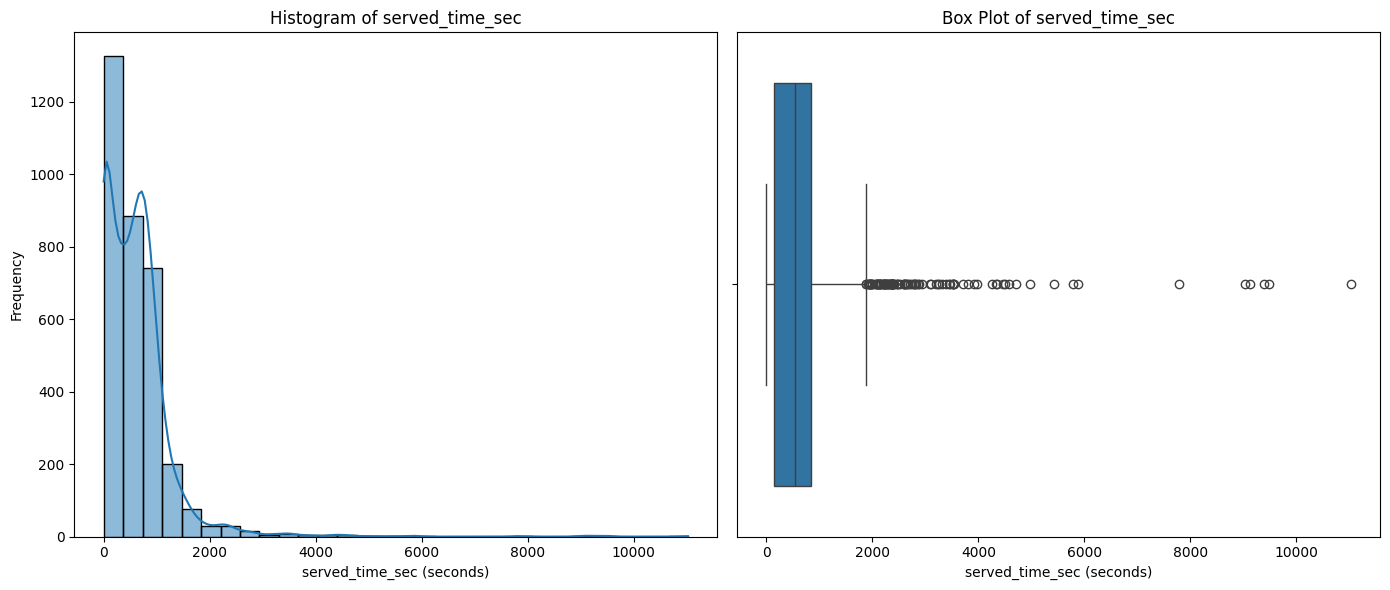

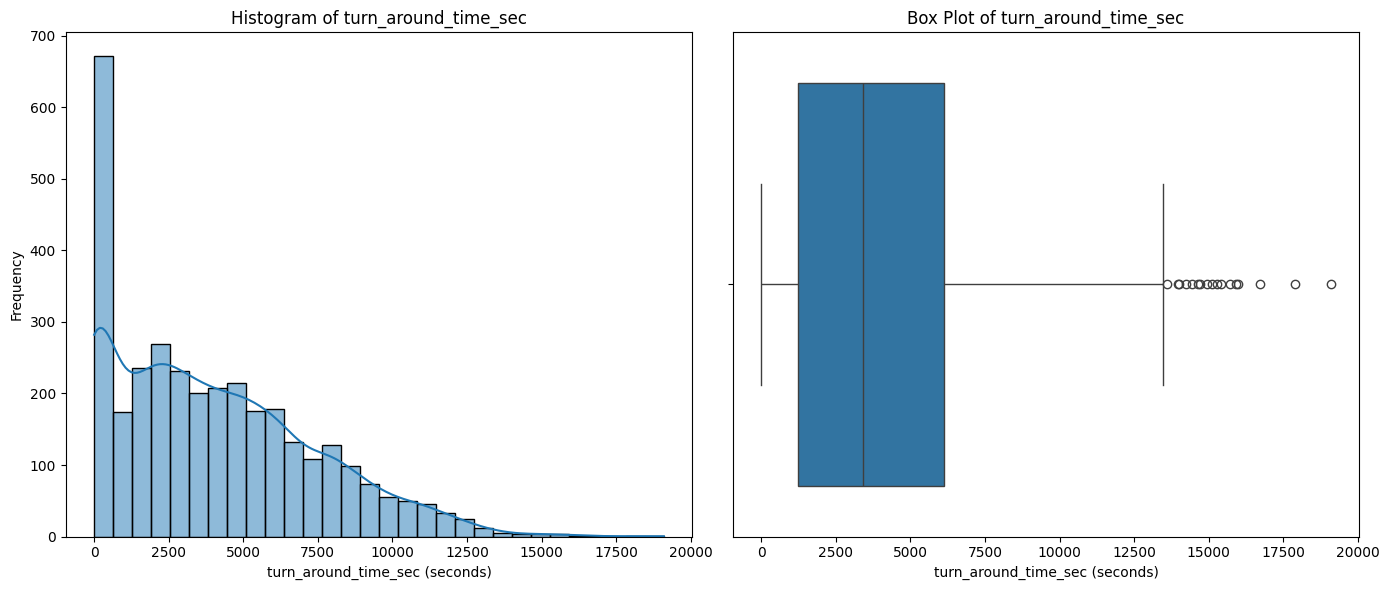

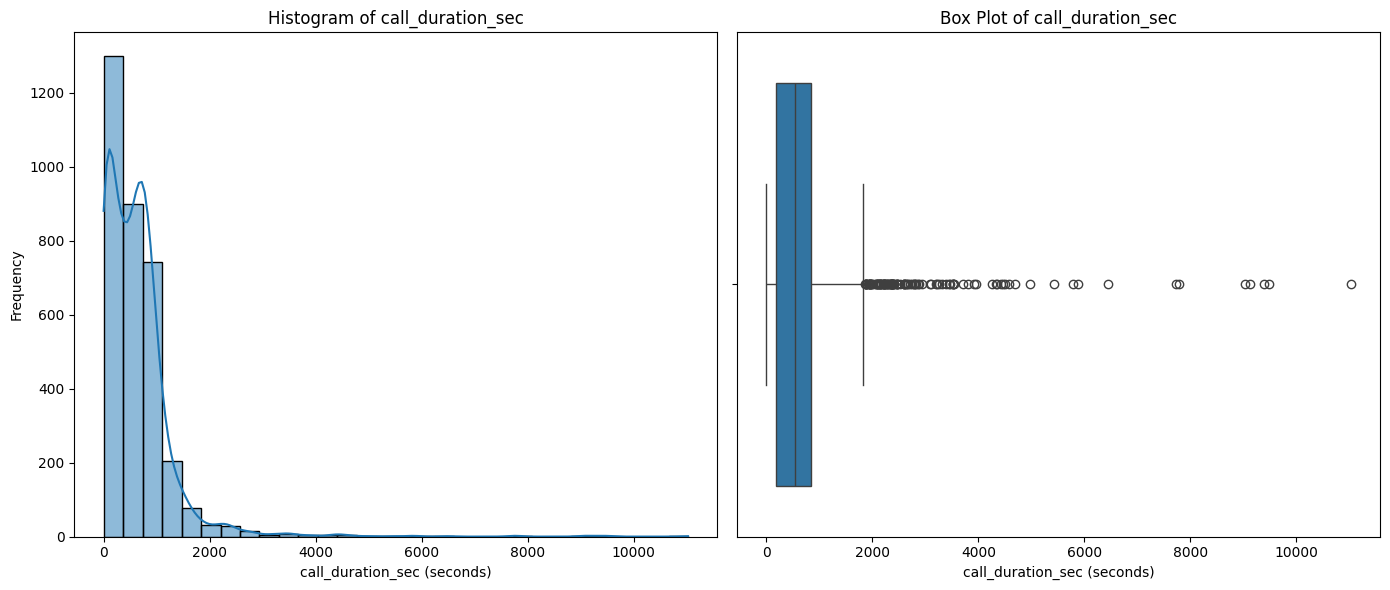

In [123]:
# Convert datetime columns to datetime objects
calls['started_at'] = pd.to_datetime(calls['started_at'])
calls['ended_at'] = pd.to_datetime(calls['ended_at'])
calls['called_date'] = pd.to_datetime(calls['called_date'])

# Filter out invalid dates and times
invalid_date = pd.Timestamp('1900-01-01')
invalid_time = pd.to_timedelta('00:00:00')

calls = calls[~((calls['started_at'] == invalid_date) | (calls['ended_at'] == invalid_date) |
                (calls['called_date'] == invalid_date) | (calls['waiting_time'] == invalid_time) |
                (calls['served_time'] == invalid_time) | (calls['turn_around_time'] == invalid_time))]

# Calculate call duration as timedelta
calls['call_duration'] = calls['ended_at'] - calls['started_at']

# Convert time columns to timedelta
calls['waiting_time'] = pd.to_timedelta(calls['waiting_time'])
calls['served_time'] = pd.to_timedelta(calls['served_time'])
calls['turn_around_time'] = pd.to_timedelta(calls['turn_around_time'])

# Convert timedeltas to seconds for plotting
calls['waiting_time_sec'] = calls['waiting_time'].dt.total_seconds()
calls['served_time_sec'] = calls['served_time'].dt.total_seconds()
calls['turn_around_time_sec'] = calls['turn_around_time'].dt.total_seconds()
calls['call_duration_sec'] = calls['call_duration'].dt.total_seconds()

# List of metrics to visualize
metrics = ['waiting_time_sec', 'served_time_sec', 'turn_around_time_sec', 'call_duration_sec']

# Create histograms and box plots
for metric in metrics:
    plt.figure(figsize=(14, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(calls[metric], kde=True, bins=30)
    plt.title(f'Histogram of {metric}')
    plt.xlabel(f'{metric} (seconds)')
    plt.ylabel('Frequency')
    # This histogram shows the distribution of the metric across all calls, indicating how often different values occur.
    # The KDE (Kernel Density Estimate) line provides a smoothed estimate of the distribution.

    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=calls[metric])
    plt.title(f'Box Plot of {metric}')
    plt.xlabel(f'{metric} (seconds)')
    # This box plot represents the spread of the metric, displaying the median, quartiles, and potential outliers.
    # The box represents the interquartile range (IQR), while the line inside the box indicates the median value.
    # The whiskers extend to 1.5 times the IQR, and points beyond this range are considered outliers.

    plt.tight_layout()
    plt.show()


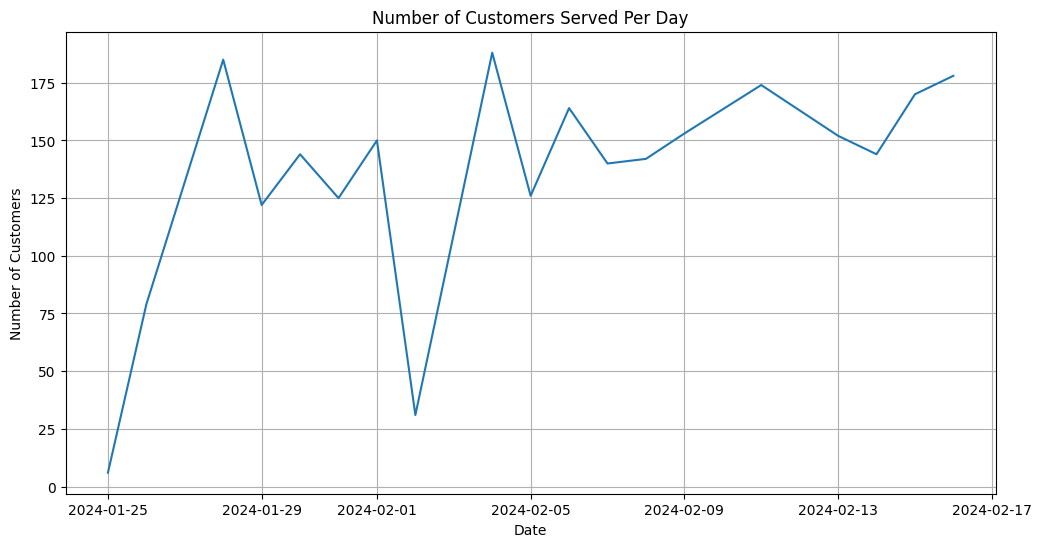

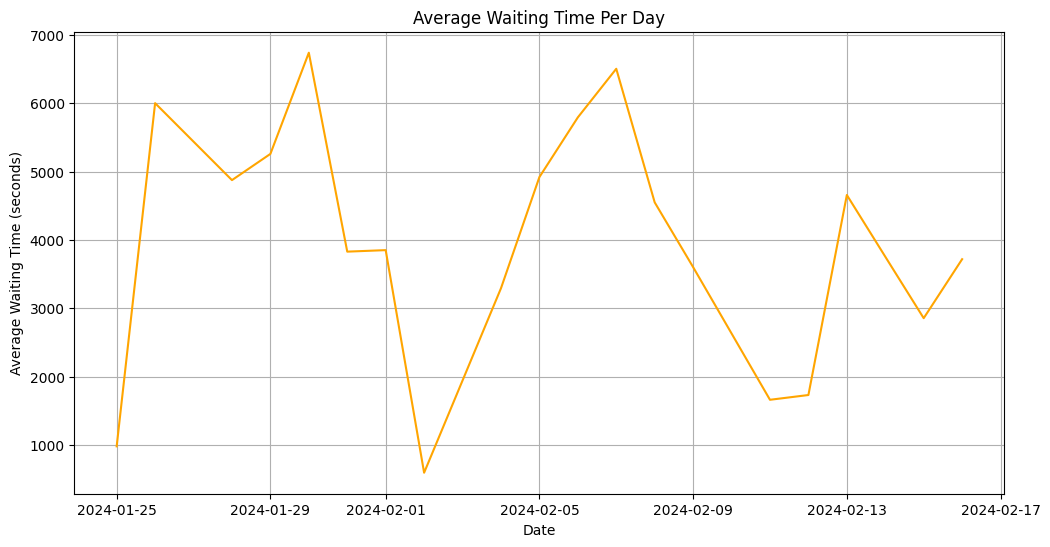

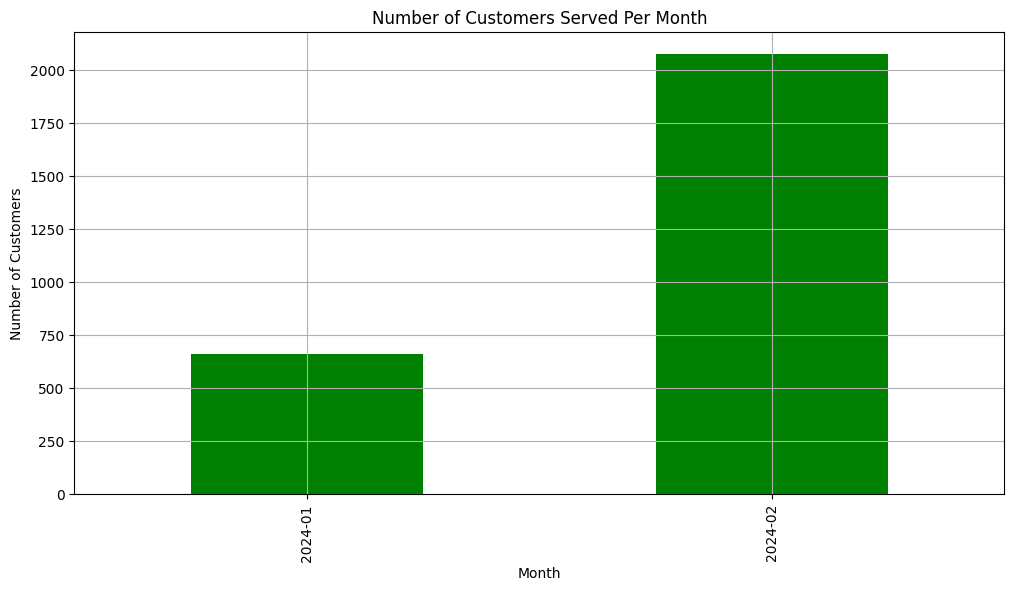

In [124]:
# Converting datetime columns to datetime objects, filtering out invalid values
calls['started_at'] = pd.to_datetime(calls['started_at'], errors='coerce')
calls['ended_at'] = pd.to_datetime(calls['ended_at'], errors='coerce')
calls['called_date'] = pd.to_datetime(calls['called_date'], errors='coerce')

# Filtering out invalid datetime and date values
calls = calls[(calls['started_at'] != '1900-01-01 00:00:00') & (calls['ended_at'] != '1900-01-01 00:00:00') & (calls['called_date'] != '1900-01-01')]

# Converting time columns to timedelta, filtering out invalid values
calls['waiting_time'] = pd.to_timedelta(calls['waiting_time'], errors='coerce')
calls['served_time'] = pd.to_timedelta(calls['served_time'], errors='coerce')
calls['turn_around_time'] = pd.to_timedelta(calls['turn_around_time'], errors='coerce')

# Filtering out invalid time values
calls = calls[(calls['waiting_time'] != pd.Timedelta(0)) & (calls['served_time'] != pd.Timedelta(0)) & (calls['turn_around_time'] != pd.Timedelta(0))]

# Calculating call duration as timedelta
calls['call_duration'] = calls['ended_at'] - calls['started_at']

# Converting timedeltas to seconds for easier analysis
calls['waiting_time_sec'] = calls['waiting_time'].dt.total_seconds()
calls['served_time_sec'] = calls['served_time'].dt.total_seconds()
calls['turn_around_time_sec'] = calls['turn_around_time'].dt.total_seconds()
calls['call_duration_sec'] = calls['call_duration'].dt.total_seconds()

# Grouping by day to get number of customers served per day and average waiting time per day
calls_per_day = calls.groupby(calls['called_date'].dt.date).size()
avg_waiting_time_per_day = calls.groupby(calls['called_date'].dt.date)['waiting_time_sec'].mean()

# Grouping by counter to get number of customers served per counter
calls_per_counter = calls.groupby('counter_id').size()

# Grouping by month to get number of customers served per month
calls['month'] = calls['called_date'].dt.to_period('M')
calls_per_month = calls.groupby(calls['month']).size()

# Extracting hour from 'started_at' to find the peak hour
calls['hour'] = calls['started_at'].dt.hour
calls_per_hour = calls.groupby('hour').size()

# Finding the peak hour
peak_hour = calls_per_hour.idxmax()
peak_hour_value = calls_per_hour.max()

# Ploting the number of customers served per day
plt.figure(figsize=(12, 6))
calls_per_day.plot(kind='line')
plt.title('Number of Customers Served Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Customers')
# This line chart shows the trend of the number of customers served each day, highlighting peaks and troughs over time.
plt.grid(True)
plt.show()

# Ploting the average waiting time per day
plt.figure(figsize=(12, 6))
avg_waiting_time_per_day.plot(kind='line', color='orange')
plt.title('Average Waiting Time Per Day')
plt.xlabel('Date')
plt.ylabel('Average Waiting Time (seconds)')
# This line chart shows the trend of the average waiting time for customers each day, indicating how it varies over time.
plt.grid(True)
plt.show()


# Ploting the number of customers served per month
plt.figure(figsize=(12, 6))
calls_per_month.plot(kind='bar', color='green')
plt.title('Number of Customers Served Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
# This bar chart shows the total number of customers served each month, indicating seasonal trends or variations in customer traffic.
plt.grid(True)
plt.show()


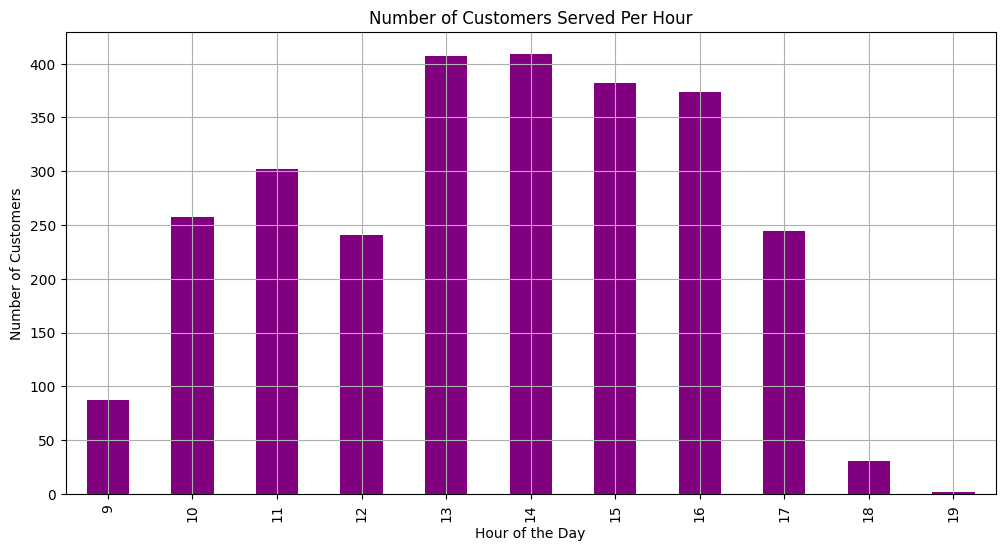

The peak hour is 14:00 with 409 customers served.


In [125]:
# Ploting the number of customers served per hour to identify peak hour
plt.figure(figsize=(12, 6))
calls_per_hour.plot(kind='bar', color='purple')
plt.title('Number of Customers Served Per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Customers')
# This bar chart shows the number of customers served during each hour of the day, highlighting the peak hour for customer service.
plt.grid(True)
plt.show()

print(f'The peak hour is {peak_hour}:00 with {peak_hour_value} customers served.')

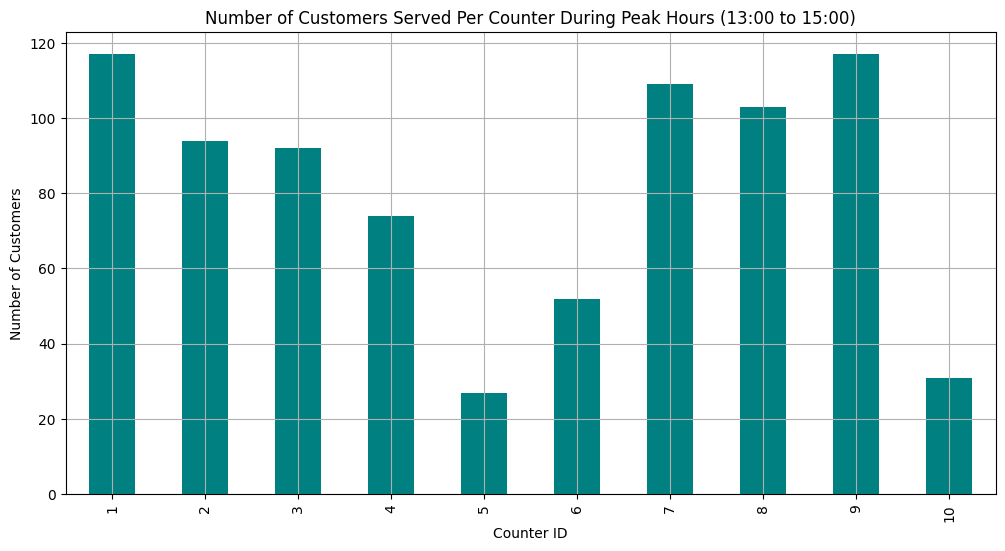

In [126]:
# Filtering the calls data for the peak hours (13:00 to 15:00)
peak_hour_data = calls[(calls['hour'] == 13) | (calls['hour'] == 14)]

# Grouping by counter to get the number of customers served per counter during the peak hours
calls_per_counter_peak_hour = peak_hour_data.groupby('counter_id').size()

# Ploting the number of customers served by each counter during the peak hours
plt.figure(figsize=(12, 6))
calls_per_counter_peak_hour.plot(kind='bar', color='teal')
plt.title('Number of Customers Served Per Counter During Peak Hours (13:00 to 15:00)')
plt.xlabel('Counter ID')
plt.ylabel('Number of Customers')
# This bar chart shows the number of customers served by each counter during the peak hours (13:00 to 15:00), highlighting which counters are busiest during this time.
plt.grid(True)
plt.show()


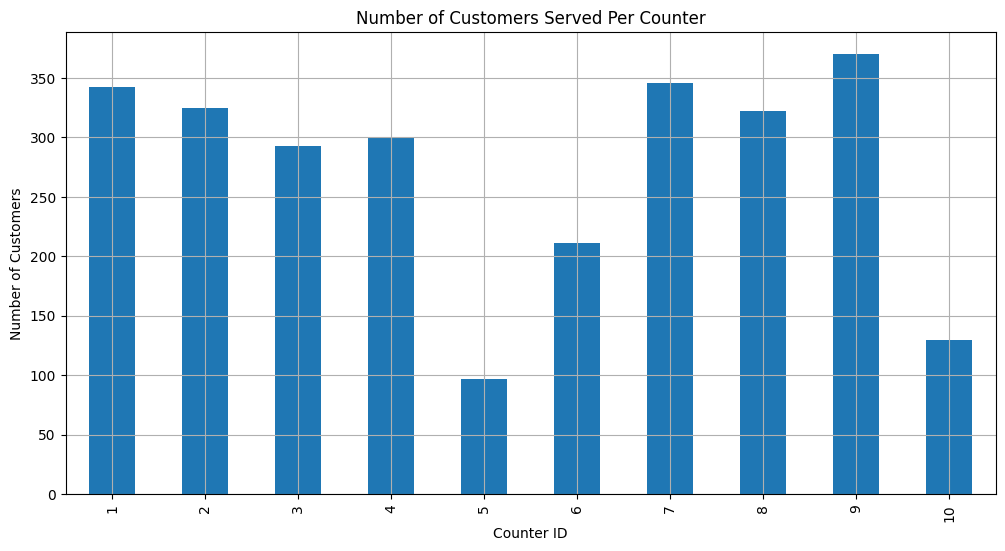

In [127]:
# Ploting the number of customers served per counter
plt.figure(figsize=(12, 6))
calls_per_counter.plot(kind='bar')
plt.title('Number of Customers Served Per Counter')
plt.xlabel('Counter ID')
plt.ylabel('Number of Customers')
# This bar chart shows the total number of customers served by each counter, highlighting the workload distribution among counters.
plt.grid(True)
plt.show()

In [128]:
#generaring maximum waittime during the peak hours
# Filter for peak hours (13:00 to 15:00) and exclude invalid times and dates
peak_hours_calls = calls[(calls['started_at'].dt.time >= pd.to_datetime('13:00:00').time()) &
                         (calls['started_at'].dt.time <= pd.to_datetime('15:00:00').time())]

# Ensuring we exclude invalid times and dates
peak_hours_calls = peak_hours_calls[(peak_hours_calls['waiting_time'] != pd.to_timedelta('00:00:00')) &
                                    (peak_hours_calls['started_at'] != pd.Timestamp('1900-01-01 00:00:00'))]

# Calculating average waiting time during peak hours
max_waiting_time_peak_hours = peak_hours_calls['waiting_time_sec'].max()

# Converting average waiting time from seconds to a more readable format
max_waiting_time_peak_hours_timedelta = pd.to_timedelta(max_waiting_time_peak_hours, unit='s')

print(f"Maximmum Waiting Time during Peak Hours (13:00 to 15:00): {max_waiting_time_peak_hours_timedelta}")


Maximmum Waiting Time during Peak Hours (13:00 to 15:00): 0 days 03:30:40
